### Import modules

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Read Image Function

In [55]:
def Read_img(path):
    img= open(path,"r")
    g= img.readline()
    c= img.readline()
    rc= img.readline()
    max= int(img.readline())
    
    [col,row]=[int (i) for i in rc.split()]
    k=np.zeros((row,col),np.int64)  #Arry to store all image pixels
    for i in range (row):
        for j in range(col):
            k[i,j]=img.readline()
    
    img.close()
    plt.imshow(k,cmap='gray')
    return k,g,c,rc,max,col,row

### Store/Write O/p Image Function

In [56]:
def Write_img(path,k,g,c,rc,max,col,row):
    img= open(path,"w")
    img.write(g)
    img.write(c)
    img.write(rc)
    img.write(str(max)+"\n")
    
    for i in range(row):
        for j in range(col):
            img.write("%d\n"%k[i,j])
    plt.imshow(k,cmap='gray')
    img.close()

### Function used for padding

In [57]:
def add_padding(arr,row,col,k_row,k_col):
    r_pd_size= (k_row-1)//2
    c_pd_size= (k_col-1)//2
    n_row=row+r_pd_size*2
    n_col=col+c_pd_size*2
    new_arr= np.zeros((n_row,n_col),np.int64)
    for i in range(r_pd_size,row+r_pd_size):
        for j in range(c_pd_size,col+c_pd_size):
            new_arr[i,j]=arr[i-r_pd_size,j-c_pd_size]
    return new_arr,n_row,n_col

### Laplacian Mask

In [58]:
def laplacian(arr,row,col):
    #kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) #kernel=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]]) #kernel=np.array([[0,1,0],[1,-4,1],[0,1,0]]) #kernel=np.array([[1,1,1],[1,-8,1],[1,1,1]])
    kernel=np.array([[0,1,0],[1,-4,1],[0,1,0]]) 
    k_row,k_col=kernel.shape
    padded_img,n_row,n_col= add_padding(arr,row,col,k_row,k_col)
    result= np.zeros((row,col),np.int64)  #Arry to store all image pixels after convolutation

    for i in range(row):
        for j in range(col):
            result[i, j] = np.rint(np.sum(padded_img[i:i+k_row, j:j+k_col] * kernel))

    return result

### Enhanced Laplation Filter

In [59]:
def laplacian_enhanced(arr,row,col):
    #kernel=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]]) #kernel=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) #kernel=np.array([[0,1,0],[1,-5,1],[0,1,0]]) #kernel=np.array([[1,1,1],[1,-9,1],[1,1,1]])
    kernel=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
    k_row,k_col=kernel.shape
    padded_img,n_row,n_col= add_padding(arr,row,col,k_row,k_col)
    result= np.zeros((row,col),np.int64)  #Arry to store all image pixels after convolutation

    for i in range(row):
        for j in range(col):
            result[i, j] = np.rint(np.sum(padded_img[i:i+k_row, j:j+k_col] * kernel))

    return result

### Roberts Operator

In [60]:
def roberts(arr,row,col):
    gx_kernel=np.array([[-1,0],[0,-1]]) 
    gy_kernel=np.array([[0,-1],[1,0]])
    k_row,k_col=gx_kernel.shape
    padded_img,n_row,n_col= add_padding(arr,row,col,k_row,k_col)
    result= np.zeros((row,col),np.int64)  #Arry to store all image pixels after convolutation

    for i in range(row):
        for j in range(col):
            gx = np.sum(padded_img[i:i+k_row, j:j+k_col] * gx_kernel)
            gy = np.sum(padded_img[i:i+k_row, j:j+k_col] * gy_kernel)
            result[i,j]= np.rint(math.sqrt((gx**2)+(gy**2)))

    return result

### Sobel Operator

In [61]:
def sobel(arr,row,col):
    gx_kernel=np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) 
    gy_kernel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    k_row,k_col=gx_kernel.shape
    padded_img,n_row,n_col= add_padding(arr,row,col,k_row,k_col)
    result= np.zeros((row,col),np.int64)  #Arry to store all image pixels after convolutation

    for i in range(row):
        for j in range(col):
            gx = np.sum(padded_img[i:i+k_row, j:j+k_col] * gx_kernel)
            gy = np.sum(padded_img[i:i+k_row, j:j+k_col] * gy_kernel)
            result[i,j]= np.rint(math.sqrt((gx**2)+(gy**2)))
    return result

### Prewitt Operator

In [62]:
def prewitt(arr,row,col):
    gx_kernel=np.array([[-1,-1,-1],[0,0,0],[1,1,1]]) 
    gy_kernel=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    k_row,k_col=gx_kernel.shape
    padded_img,n_row,n_col= add_padding(arr,row,col,k_row,k_col)
    result= np.zeros((row,col),np.int64)  #Arry to store all image pixels after convolutation

    for i in range(row):
        for j in range(col):
            gx = np.sum(padded_img[i:i+k_row, j:j+k_col] * gx_kernel)
            gy = np.sum(padded_img[i:i+k_row, j:j+k_col] * gy_kernel)
            result[i,j]= np.rint(math.sqrt((gx**2)+(gy**2)))
    return result

### Main Function


Enter 1 to apply Laplation filter
Enter 2 to apply Enhanced Laplation filter
Enter 3 to apply Roberts filter
Enter 4 to apply Sobel filter
Enter 5 to apply Prewitt filter
Enter your choice::  2


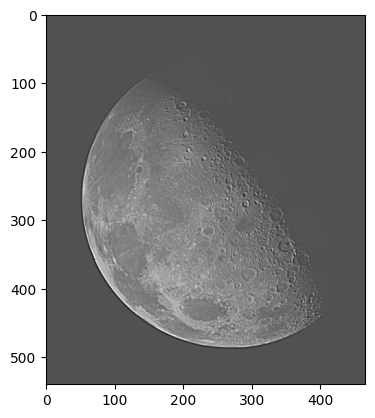

In [72]:
if __name__ == '__main__':
    
    k1,g1,c1,rc1,max1,col1,row1= Read_img("..\images\DIP3E_Original_Images_CH03\Fig0338(a)(blurry_moon).pgm")

    ch=int(input("\nEnter 1 to apply Laplation filter\nEnter 2 to apply Enhanced Laplation filter\nEnter 3 to apply Roberts filter\nEnter 4 to apply Sobel filter\nEnter 5 to apply Prewitt filter\nEnter your choice:: "))

    if ch==1:
        result=laplacian(k1,row1,col1)
        Write_img(f"outputs\\laplation_img.pgm",result,g1,c1,rc1,max1,col1,row1)
    elif ch==2:
        result=laplacian_enhanced(k1,row1,col1)
        Write_img(f"outputs\\enhanced_laplation_img.pgm",result,g1,c1,rc1,max1,col1,row1)
    elif ch==3:
        result=roberts(k1,row1,col1)
        Write_img(f"outputs\\roberts_img.pgm",result,g1,c1,rc1,max1,col1,row1)
    
    elif ch==4:
        result=sobel(k1,row1,col1)
        Write_img(f"outputs\\sobel_img.pgm",result,g1,c1,rc1,max1,col1,row1)
        
    elif ch==5:
        result=prewitt(k1,row1,col1)
        Write_img(f"outputs\\prewitt_img.pgm",result,g1,c1,rc1,max1,col1,row1)
        
    else :
        print("\nInvalid choice!")

### Tests

In [64]:
input_arr= arr=np.array([[1,8,8,0,7],[4,7,9,5,7],[5,4,6,8,6],[4,2,0,1,5],[0,1,0,2,0]])
row,col=input_arr.shape

In [66]:
row=int(input("Enter Row size: "))
col=int(input("Enter Column size: "))
print("Enter Data:")
elements = list(map(int, input().split()))  
input_arr = np.array(elements).reshape(row, col)  
print(input_arr)

Enter Row size:  3
Enter Column size:  3


Enter Data:


 3 1 4 3 2 5 2 3 4


[[3 1 4]
 [3 2 5]
 [2 3 4]]


In [67]:
# Test Laplation Filter
result= laplacian(input_arr,row,col)
print(f"input\n{input_arr}\noutput\n{result}")

input
[[3 1 4]
 [3 2 5]
 [2 3 4]]
output
[[ -8   5 -10]
 [ -5   4 -10]
 [ -2  -4  -8]]


In [68]:
# Test Enhanced Laplation Filter
result= laplacian_enhanced(input_arr,row,col)
print(f"input\n{input_arr}\noutput\n{result}")

input
[[3 1 4]
 [3 2 5]
 [2 3 4]]
output
[[21 -8 28]
 [16 -7 31]
 [10 11 26]]


In [69]:
# Test Roberts Filter
result= roberts(input_arr,row,col)
print(f"input\n{input_arr}\noutput\n{result}")

input
[[3 1 4]
 [3 2 5]
 [2 3 4]]
output
[[5 6 9]
 [6 6 9]
 [5 7 8]]


In [70]:
# Test Sobel Filter
result= sobel(input_arr,row,col)
print(f"input\n{input_arr}\noutput\n{result}")

input 
[[3 1 4]
 [3 2 5]
 [2 3 4]]
output
[[ 9 13 13]
 [ 8  8  8]
 [11 13 14]]


In [71]:
# Test Prewitt Filter
result= prewitt(input_arr,row,col)
print(f"input\n{input_arr}\noutput\n{result}")

input
[[3 1 4]
 [3 2 5]
 [2 3 4]]
output
[[ 6 10  8]
 [ 6  5  6]
 [ 7 11  9]]
